In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

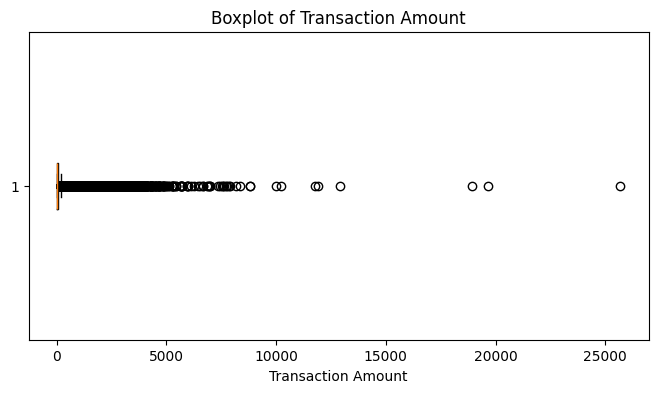

In [7]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Amount'], vert=False)
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount')
plt.show()

In [8]:
mean_amount = df['Amount'].mean()
std_amount = df['Amount'].std()

In [9]:
lower_bound = mean_amount - 2 * std_amount
upper_bound = mean_amount + 2 * std_amount
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -411.8905992294457
Upper bound: 588.5898377313083


In [10]:
df_clean = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_clean.shape)

Shape before outlier removal: (284807, 31)
Shape after outlier removal: (277488, 31)


In [11]:
df_clean = df_clean.drop_duplicates()

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
X_features = df_clean.drop('Class', axis=1)
y = df_clean['Class']

In [14]:
X_scaled = scaler.fit_transform(X_features)
df_scaled = pd.DataFrame(X_scaled, columns=X_features.columns)
df_scaled['Class'] = y.values

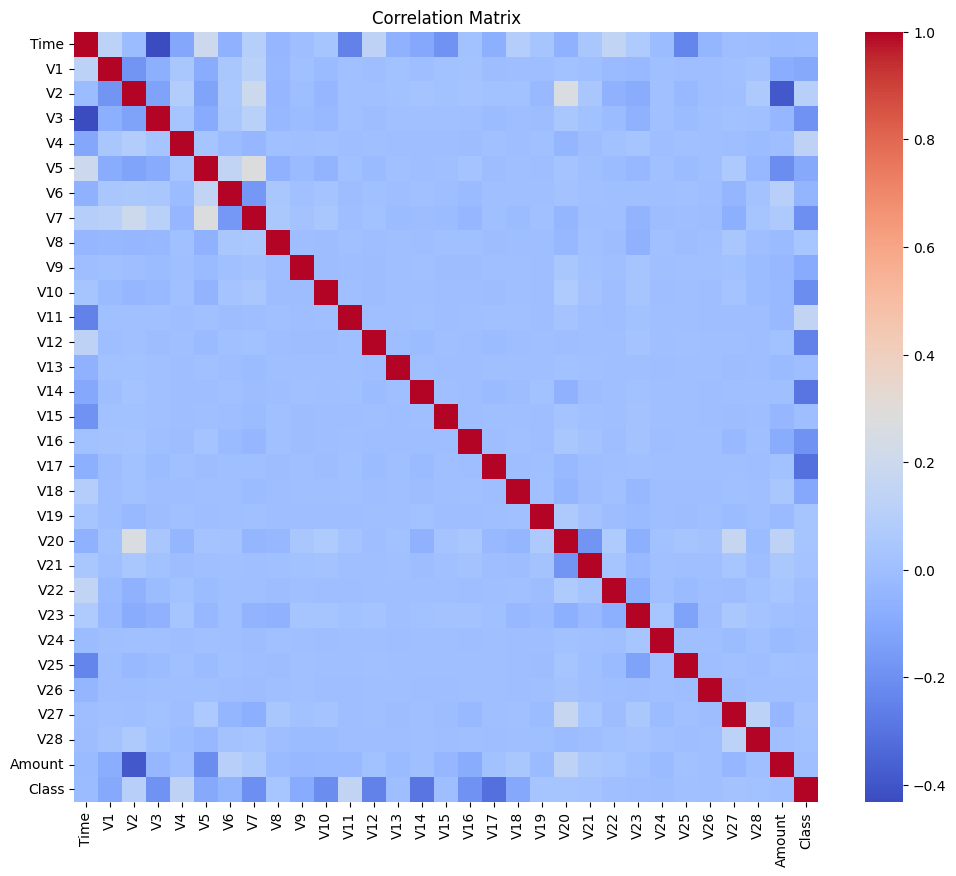

In [15]:
plt.figure(figsize=(12, 10))
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [16]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[55181     5]
 [   22    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55186
           1       0.94      0.78      0.85       101

    accuracy                           1.00     55287
   macro avg       0.97      0.89      0.93     55287
weighted avg       1.00      1.00      1.00     55287



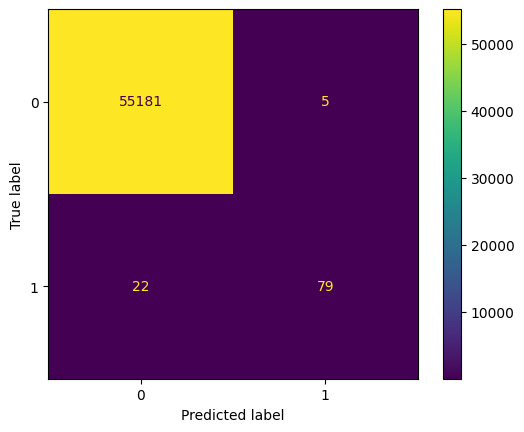

In [20]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred),display_labels=[0, 1])
cm_display.plot()
plt.show()

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print("After RandomOverSampler, class distribution:\n", pd.Series(y_ros).value_counts())

After RandomOverSampler, class distribution:
 Class
0    275991
1    275991
Name: count, dtype: int64


In [23]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
knn_ros = KNeighborsClassifier(n_neighbors=3)
knn_ros.fit(X_train_ros, y_train_ros)
pred_ros = knn_ros.predict(X_test_ros)

In [24]:
print(confusion_matrix(y_test_ros, pred_ros))
print(classification_report(y_test_ros, pred_ros))

[[55431    25]
 [    0 54941]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55456
           1       1.00      1.00      1.00     54941

    accuracy                           1.00    110397
   macro avg       1.00      1.00      1.00    110397
weighted avg       1.00      1.00      1.00    110397



In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("After SMOTE, class distribution:\n", pd.Series(y_smote).value_counts())

After SMOTE, class distribution:
 Class
0    275991
1    275991
Name: count, dtype: int64


In [27]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
knn_smote = KNeighborsClassifier(n_neighbors=3)
knn_smote.fit(X_train_smote, y_train_smote)
pred_smote = knn_smote.predict(X_test_smote)

In [28]:
print(confusion_matrix(y_test_smote, pred_smote))
print(classification_report(y_test_smote, pred_smote))

[[55375    81]
 [    0 54941]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55456
           1       1.00      1.00      1.00     54941

    accuracy                           1.00    110397
   macro avg       1.00      1.00      1.00    110397
weighted avg       1.00      1.00      1.00    110397



In [29]:
error_rate = []

for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    pred_k = knn_temp.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

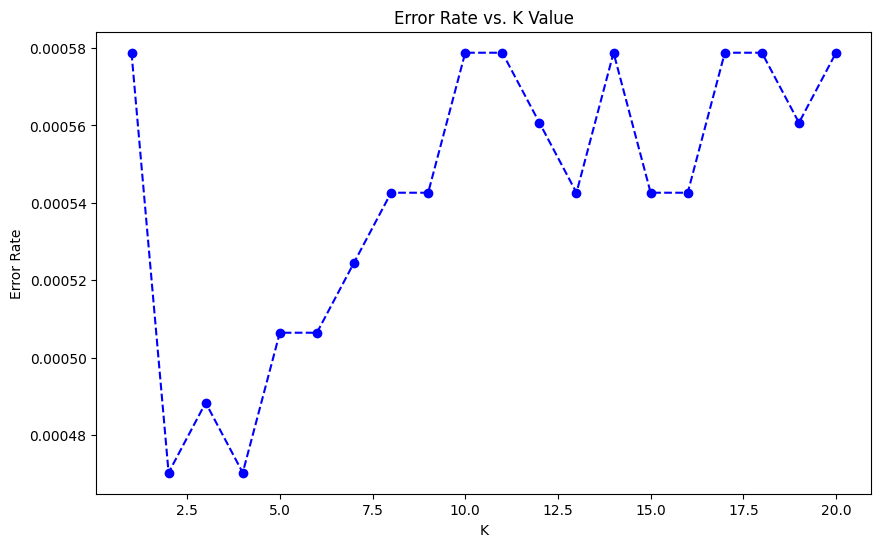

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='dashed', color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()